<a href="https://colab.research.google.com/github/bioadex/python-project/blob/main/Session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

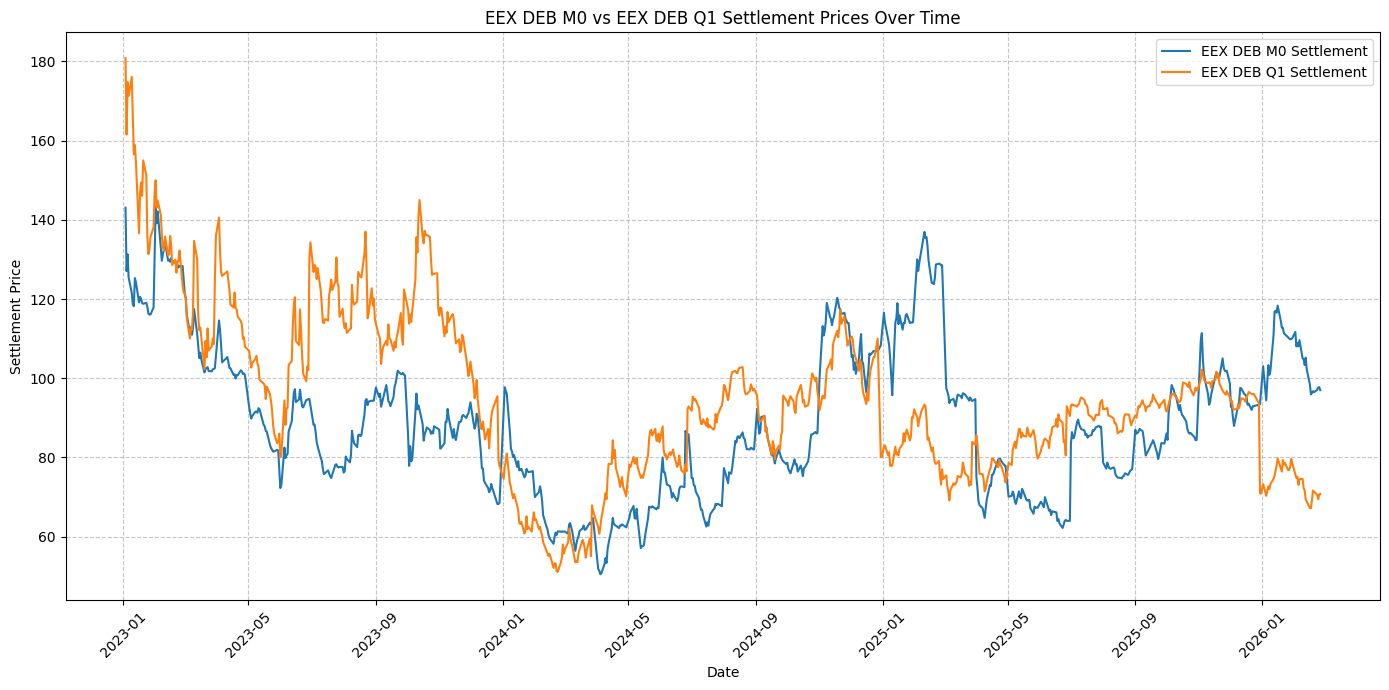

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Explicitly create copies to avoid SettingWithCopyWarning and ensure independent dataframes
historical_price_data = historical_price_data.copy()
historical_price_q1_data = historical_price_q1_data.copy()

# Convert 'Date' column in historical_price_data to datetime
historical_price_data['Date'] = pd.to_datetime(historical_price_data['Date'])

# Process historical_price_q1_data: handle potential renaming of 'Date.1' to 'Date'
if 'Date.1' in historical_price_q1_data.columns:
    historical_price_q1_data['Date.1'] = pd.to_datetime(historical_price_q1_data['Date.1'])
    # Rename 'Date.1' to 'Date' for merging
    historical_price_q1_data = historical_price_q1_data.rename(columns={'Date.1': 'Date'})
elif 'Date' in historical_price_q1_data.columns:
    # If 'Date.1' was already renamed to 'Date' in a previous run, ensure 'Date' is datetime
    historical_price_q1_data['Date'] = pd.to_datetime(historical_price_q1_data['Date'])
else:
    # Fallback/Error case: neither 'Date.1' nor 'Date' found.
    print("Error: Neither 'Date.1' nor 'Date' column found in historical_price_q1_data. Cannot plot.")
    # You might want to raise an error or handle this case more specifically

# Merge the two DataFrames on the 'Date' column
# We are merging on the 'Date' column which is now consistently named 'Date' in both dataframes
merged_data = pd.merge(historical_price_data[['Date', 'Settlement']],
                       historical_price_q1_data[['Date', 'Settlement.1']],
                       on='Date', how='outer')

# Sort the data by date to ensure correct line plotting
merged_data = merged_data.sort_values(by='Date')

# Plotting the data
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Settlement', data=merged_data, label='EEX DEB M0 Settlement')
sns.lineplot(x='Date', y='Settlement.1', data=merged_data, label='EEX DEB Q1 Settlement')

plt.title('EEX DEB M0 vs EEX DEB Q1 Settlement Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Settlement Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd

# Define the file path and the new sheet name
file_path = 'Historical_Data.xlsx'
sheet_name_nordic = 'Nordic_Price'

# Load the specified sheet from the Excel file into a new pandas DataFrame
try:
    nordic_df = pd.read_excel(file_path, sheet_name=sheet_name_nordic)
    print(f"Successfully loaded sheet '{sheet_name_nordic}' from '{file_path}'.")
    # Display the first 5 rows of the new DataFrame to confirm it loaded correctly
    display(nordic_df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please make sure it's uploaded to your Colab environment.")
except ValueError as e:
    print(f"Error loading sheet '{sheet_name_nordic}': {e}. Please check if the sheet name is correct.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded sheet 'Nordic_Price' from 'Historical_Data.xlsx'.


,Date,Nordic_Settlement_Monthly,Nordic_Settlement_Quarterly
0,2023-01-02,182.0,106.0
1,2023-01-03,160.5,94.5
2,2023-01-04,139.5,77.5
3,2023-01-05,140.4,80.0
4,2023-01-06,150.0,85.0


### Explanation of the Sheet Loading Script:

1.  **`import pandas as pd`**: Imports the pandas library.
2.  **`file_path` and `sheet_name_nordic`**: Define the Excel file path and the specific sheet name to load (`Nordic_Price_MO_QR`).
3.  **`nordic_df = pd.read_excel(...)`**: This line uses `pd.read_excel()` to load the data from the specified sheet into a new DataFrame called `nordic_df`.
4.  **Error Handling (`try-except`)**: Includes blocks to catch potential `FileNotFoundError` (if the Excel file isn't found), `ValueError` (if the sheet name is incorrect), or any other `Exception`.
5.  **`display(nordic_df.head())`**: Shows the first 5 rows of the newly loaded `nordic_df` to verify the data.

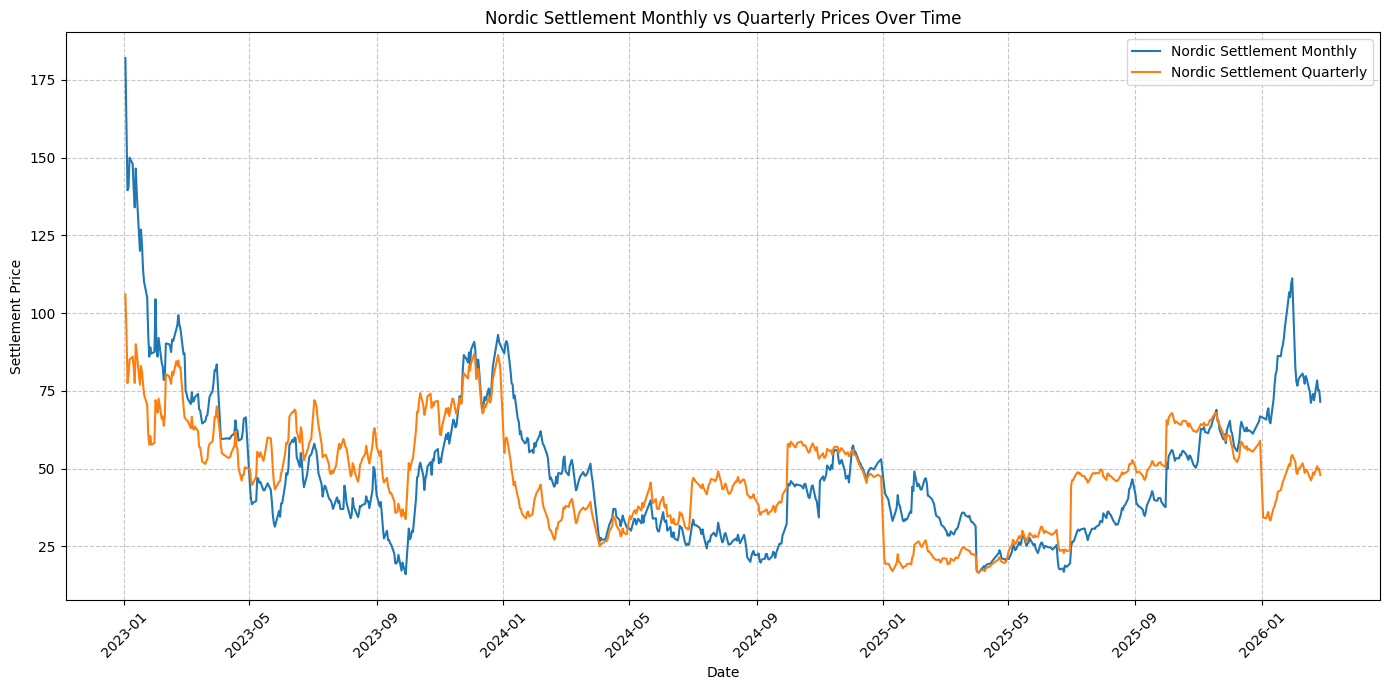

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the 'Date' column in nordic_df is in datetime format
nordic_df['Date'] = pd.to_datetime(nordic_df['Date'])

# Sort the data by date to ensure correct line plotting
nordic_df = nordic_df.sort_values(by='Date')

# Plotting the data
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Nordic_Settlement_Monthly', data=nordic_df, label='Nordic Settlement Monthly')
sns.lineplot(x='Date', y='Nordic_Settlement_Quarterly', data=nordic_df, label='Nordic Settlement Quarterly')

plt.title('Nordic Settlement Monthly vs Quarterly Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Settlement Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for final_merged_data:\n")
display(final_merged_data.describe())

# Display general information about the DataFrame, including data types and non-null counts
print("\nInfo for final_merged_data:\n")
final_merged_data.info()


Summary Statistics for final_merged_data:



,Date,Settlement,Settlement.1,Nordic_Settlement_Monthly,Nordic_Settlement_Quarterly
count,806,783.000000,805.000000,791.000000,791.000000
mean,2024-07-29 19:12:21.439206144,88.812427,94.924484,48.653338,47.879949
min,2023-01-02 00:00:00,50.520000,51.130000,16.000000,16.500000
25%,2023-10-13 18:00:00,75.645000,80.510000,31.250000,35.865000
50%,2024-07-30 12:00:00,86.570000,93.020000,44.250000,48.400000
75%,2025-05-15 18:00:00,100.770000,107.910000,59.925000,58.000000
max,2026-02-26 00:00:00,143.350000,180.800000,182.000000,106.000000
std,NaN,18.676446,21.122234,23.382802,16.424667



Info for final_merged_data:

<class 'pandas.core.frame.DataFrame'>
Index: 807 entries, 1 to 0
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         806 non-null    datetime64[ns]
 1   Settlement                   783 non-null    float64       
 2   Settlement.1                 805 non-null    float64       
 3   Nordic_Settlement_Monthly    791 non-null    float64       
 4   Nordic_Settlement_Quarterly  791 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 37.8 KB


In [17]:
import matplotlib.pyplot as plt

# Define the filename for the saved plot
output_plot_filename = 'EEX_Nordic_Comparison_Plot.svg'

# Save the currently active plot figure to an SVG file
# bbox_inches='tight' ensures that no labels are cut off
# dpi=300 sets a high resolution, though SVG is vector-based so DPI is less critical
plt.savefig(output_plot_filename, format='svg', bbox_inches='tight')

print(f"The comparison plot has been saved as '{output_plot_filename}'. You can find it in your Colab files and open it with a web browser or image viewer that supports SVG to zoom.")

The comparison plot has been saved as 'EEX_Nordic_Comparison_Plot.svg'. You can find it in your Colab files and open it with a web browser or image viewer that supports SVG to zoom.


<Figure size 640x480 with 0 Axes>

### Explanation of the Combined Plotting Script:

1.  **Import Libraries**: Imports `matplotlib.pyplot`, `seaborn`, and `pandas` for data manipulation and visualization.

2.  **Ensure Datetime Format**: Confirms that the 'Date' columns in both `merged_data` and `nordic_df` are in datetime format. This is crucial for accurate time-series plotting and merging.

3.  **Merge DataFrames**:
    *   `pd.merge()` is used to combine `merged_data` (containing EEX DEB M0 and Q1 data) with relevant columns from `nordic_df` (Nordic Monthly and Quarterly data).
    *   `on='Date'` specifies the common column for merging.
    *   `how='outer'` ensures that all unique dates from both datasets are included in the `final_merged_data` DataFrame, even if one dataset has dates not present in the other.

4.  **Sort Data**: The `final_merged_data` DataFrame is sorted by the 'Date' column. This is essential to ensure that the line plots connect data points in chronological order, showing correct trends.

5.  **Plotting with Seaborn**:
    *   `plt.figure(figsize=(18, 9))` creates a larger figure to comfortably display four lines.
    *   `sns.lineplot()` is called four times, each plotting one of the desired settlement price series ('Settlement', 'Settlement.1', 'Nordic_Settlement_Monthly', 'Nordic_Settlement_Quarterly') against the 'Date' column. Each line is given a distinct `label` for the legend.
    *   `plt.title()`, `plt.xlabel()`, `plt.ylabel()` set the plot's title and axis labels for clarity.
    *   `plt.legend(title='Settlement Type')` displays a legend so you can differentiate between the lines.
    *   `plt.grid(True, linestyle='--', alpha=0.7)` adds a subtle grid for easier reading of values.
    *   `plt.xticks(rotation=45)` rotates the date labels on the x-axis to prevent overlap, especially with a larger date range.
    *   `plt.tight_layout()` automatically adjusts plot parameters for a tight layout, preventing labels or titles from being cut off.
    *   `plt.show()` displays the generated plot.

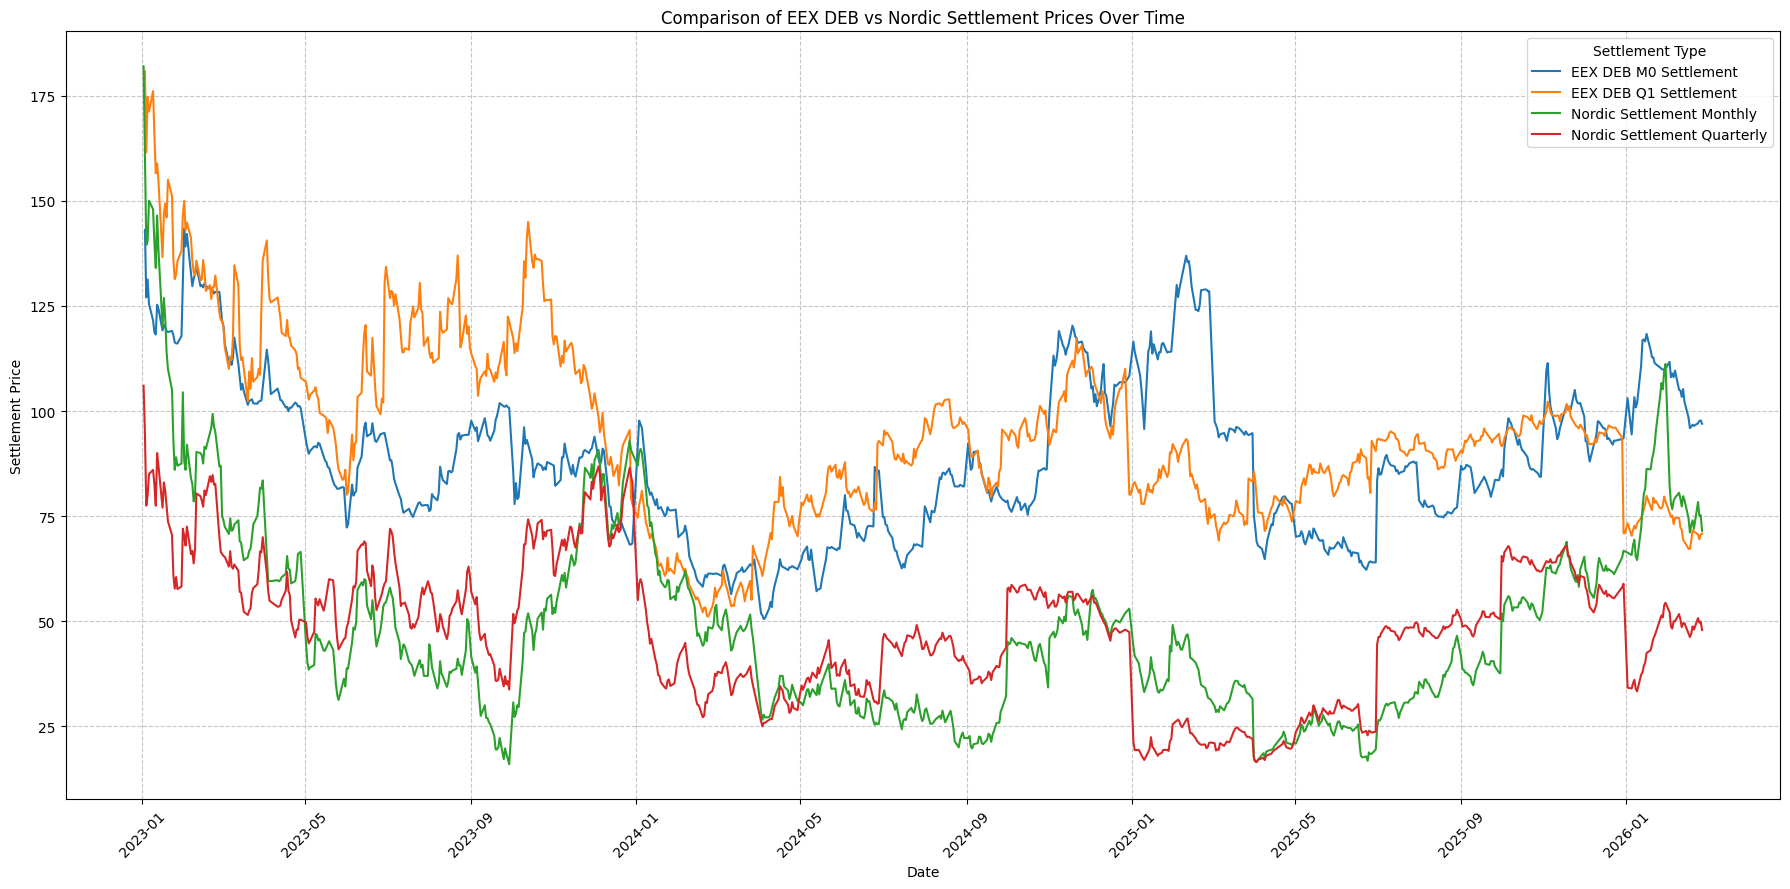

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure Date columns are in datetime format (they should be from previous steps, but good to ensure)
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
nordic_df['Date'] = pd.to_datetime(nordic_df['Date'])

# Merge merged_data and nordic_df on the 'Date' column
# Use an outer merge to retain all dates from both datasets
final_merged_data = pd.merge(merged_data,
                             nordic_df[['Date', 'Nordic_Settlement_Monthly', 'Nordic_Settlement_Quarterly']],
                             on='Date', how='outer')

# Sort the data by date for proper plotting
final_merged_data = final_merged_data.sort_values(by='Date')

# Plotting all four columns
plt.figure(figsize=(18, 9))

sns.lineplot(x='Date', y='Settlement', data=final_merged_data, label='EEX DEB M0 Settlement')
sns.lineplot(x='Date', y='Settlement.1', data=final_merged_data, label='EEX DEB Q1 Settlement')
sns.lineplot(x='Date', y='Nordic_Settlement_Monthly', data=final_merged_data, label='Nordic Settlement Monthly')
sns.lineplot(x='Date', y='Nordic_Settlement_Quarterly', data=final_merged_data, label='Nordic Settlement Quarterly')

plt.title('Comparison of EEX DEB vs Nordic Settlement Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Settlement Price')
plt.legend(title='Settlement Type')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Explanation of the Plotting Script:

1.  **Import Libraries**: Imports `matplotlib.pyplot` for plotting and `seaborn` for enhanced visualizations.
2.  **Convert to Datetime**: The 'Date' column in `nordic_df` is converted to datetime objects using `pd.to_datetime()`. This is crucial for correct sorting and time-series plotting.
3.  **Sort Data**: The `nordic_df` is sorted by the 'Date' column to ensure the line plots connect points in chronological order.
4.  **Plotting with Seaborn**:
    *   `plt.figure(figsize=(14, 7))` creates a new figure with a specified size.
    *   `sns.lineplot()` is used twice to plot both the 'Nordic_Settlement_Monthly' and 'Nordic_Settlement_Quarterly' series against the 'Date' column on the same graph. Each line is given a `label` for the legend.
    *   `plt.title()`, `plt.xlabel()`, `plt.ylabel()` are used to add a title and axis labels.
    *   `plt.legend()` displays the labels for each line.
    *   `plt.grid(True, linestyle='--', alpha=0.7)` adds a grid for easier reading of values.
    *   `plt.xticks(rotation=45)` rotates the date labels on the x-axis to prevent overlap.
    *   `plt.tight_layout()` adjusts plot parameters for a tight layout.
    *   `plt.show()` displays the generated plot.

### Explanation of the Plotting Script:

1.  **Import Libraries**: We import `matplotlib.pyplot` for plotting and `seaborn` for enhanced visualizations.

2.  **Convert to Datetime**: The 'Date' and 'Date.1' columns in `historical_price_data` and `historical_price_q1_data` are converted to datetime objects using `pd.to_datetime()`. This ensures that dates are handled correctly for sorting and plotting.

3.  **Rename Column**: The 'Date.1' column in `historical_price_q1_data` is renamed to 'Date' to allow for a proper merge with `historical_price_data`.

4.  **Merge DataFrames**: `pd.merge()` is used to combine `historical_price_data` and `historical_price_q1_data` into a single DataFrame called `merged_data`.
    *   `on='Date'` specifies that the merge should happen based on the common 'Date' column.
    *   `how='outer'` ensures that all dates from both datasets are included, even if one dataset has dates not present in the other.

5.  **Sort Data**: The `merged_data` is sorted by the 'Date' column to ensure that the line plots connect points in chronological order.

6.  **Plotting with Seaborn**:
    *   `plt.figure(figsize=(14, 7))` creates a new figure with a specified size for better readability.
    *   `sns.lineplot()` is used twice to plot both the 'Settlement' and 'Settlement.1' series against the 'Date' column on the same graph. Each line is given a `label` for the legend.
    *   `plt.title()`, `plt.xlabel()`, `plt.ylabel()` are used to add a title and axis labels.
    *   `plt.legend()` displays the labels for each line.
    *   `plt.grid(True, linestyle='--', alpha=0.7)` adds a grid for easier reading of values.
    *   `plt.xticks(rotation=45)` rotates the date labels on the x-axis to prevent overlap.
    *   `plt.tight_layout()` adjusts plot parameters for a tight layout.
    *   `plt.show()` displays the generated plot.

In [5]:
# Extract rows from index 1 (corresponding to row 2) to index 806 (corresponding to row 807)
# Python indexing is 0-based, so row 2 is index 1, and row 807 is index 806.
# The slice df.iloc[1:807] will include index 1 up to (but not including) index 807.
extracted_q1_rows_df = df.iloc[1:807]

# Select the 'Settlement.1' and 'Date.1' columns from the extracted rows, as these correspond to 'EEX DEB Q1'
historical_price_q1_data = extracted_q1_rows_df[['Settlement.1', 'Date.1']]

# Define the output CSV file name
output_csv_file_3 = 'eex_deb_quarterly_historical_price.csv'

# Save the extracted data to a CSV file in the same directory
historical_price_q1_data.to_csv(output_csv_file_3, index=False)

print(f"Successfully extracted 'Settlement.1' and 'Date.1' for 'EEX DEB Q1' from row 2 to 807 and saved to '{output_csv_file_3}'.")
display(historical_price_q1_data.head())

Successfully extracted 'Settlement.1' and 'Date.1' for 'EEX DEB Q1' from row 2 to 807 and saved to 'eex_deb_quarterly_historical_price.csv'.


,Settlement.1,Date.1
1,180.80,2023-01-03
2,161.51,2023-01-04
3,174.72,2023-01-05
4,171.22,2023-01-06
5,176.06,2023-01-09


In [4]:
# Extract rows from index 1 (corresponding to row 2) to index 784 (corresponding to row 785)
# Python indexing is 0-based, so row 2 is index 1, and row 785 is index 784.
# The slice df.iloc[1:785] will include index 1 up to (but not including) index 785.
extracted_rows_df = df.iloc[1:785]

# Select the 'Settlement' and 'Date' columns from the extracted rows
historical_price_data = extracted_rows_df[['Settlement', 'Date']]

# Define the output CSV file name
output_csv_file_2 = 'eex_deb_mo_historical_price.csv'

# Save the extracted data to a CSV file in the same directory
historical_price_data.to_csv(output_csv_file_2, index=False)

print(f"Successfully extracted 'Settlement' and 'Date' from row 2 to 785 and saved to '{output_csv_file_2}'.")
display(historical_price_data.head())

Successfully extracted 'Settlement' and 'Date' from row 2 to 785 and saved to 'eex_deb_mo_historical_price.csv'.


,Settlement,Date
1,143.06,2023-01-03
2,127.03,2023-01-04
3,131.28,2023-01-05
4,125.43,2023-01-06
5,121.59,2023-01-09


In [3]:
# Filter the DataFrame for rows where 'ContractName' is 'EEX DEB M0'
# Assuming 'ContractName' column exists in your DataFrame
# Check the unique values in 'ContractName' to ensure 'EEX DEB M0' is an exact match.
# Based on the df.head() output, the column is actually 'Last update: 27.02.2026 12:01:09' which contains 'EEX DEB M0'
# Let's verify the column name that contains 'EEX DEB M0' from the df.head() output.
# The first column appears to contain the contract names, let's assume it's the 0th column based on the head output.
# Let's rename this column for clarity if it's an unnamed column or has a complex name.

# First, identify the correct column name. From df.head(), it seems the first column has a long name
# 'Last update: 27.02.2026 12:01:09' and contains 'EEX DEB M0' in its row values.
# Let's assume the user meant the column that contains 'EEX DEB M0' in its first row.
# We will use the first column and rename it for clarity or use its current name directly.

# Let's get the name of the first column
first_column_name = df.columns[0]

# Filter the DataFrame based on the content of the first column
eex_deb_m0_df = df[df[first_column_name].astype(str).str.contains('EEX DEB M0', na=False)]

# Select the 'Settlement' and 'Date' columns from the filtered DataFrame
# Based on df.head(), 'Settlement' is column index 4 and 'Date' is column index 8.
# It's safer to use the actual column names if available.
# Let's ensure these column names are correct as they might have suffixes if duplicated.

# Check available columns
# print(df.columns)

# Assuming 'Settlement' and 'Date' without suffixes are the intended ones based on the request.
# If there are multiple 'Settlement' or 'Date' columns, we might need more clarification from the user.

# Selecting the columns
extracted_data = eex_deb_m0_df[['Settlement', 'Date']]

# Define the output CSV file name
output_csv_file = 'EEX_DEB_M0.csv'

# Save the extracted data to a CSV file in the same directory
extracted_data.to_csv(output_csv_file, index=False)

print(f"Successfully extracted 'Settlement' and 'Date' for 'EEX DEB M0' and saved to '{output_csv_file}'.")
display(extracted_data.head())

Successfully extracted 'Settlement' and 'Date' for 'EEX DEB M0' and saved to 'EEX_DEB_M0.csv'.


,Settlement,Date
0,153.24,2023-01-02


In [2]:
import pandas as pd

# Define the file path and sheet name
file_path = 'Historical_Data.xlsx'  # Assuming the file is in the Colab environment's root directory
sheet_name = 'DE_Monthly_Quarterly'

# Load the specified sheet from the Excel file into a pandas DataFrame
try:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    print(f"Successfully loaded sheet '{sheet_name}' from '{file_path}'.")
    # Display the first 5 rows of the DataFrame to confirm it loaded correctly
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please make sure it's uploaded to your Colab environment.")
except ValueError as e:
    print(f"Error loading sheet '{sheet_name}': {e}. Please check if the sheet name is correct.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded sheet 'DE_Monthly_Quarterly' from 'Historical_Data.xlsx'.


,Last update: 27.02.2026 12:01:09,Open,High,Low,Settlement,Close,Volume,OpenInterest,Date,ContractName,...,Last update: 27.02.2026 12:07:40,Open.1,High.1,Low.1,Settlement.1,Close.1,Volume.1,OpenInterest.1,Date.1,ContractName.1
0,EEX DEB M0,NaN,NaN,NaN,153.24,NaN,NaN,159709.0,2023-01-02,2023-01-01,...,EEX DEB Q1,165.0,184.00,165.0,180.67,184.00,47.0,120665,2023-01-02,Q2-2023
1,2023-01-01 00:00:00,NaN,NaN,NaN,143.06,NaN,NaN,159688.0,2023-01-03,2023-01-01,...,2023-01-01 00:00:00,179.0,189.01,175.0,180.80,179.50,255.0,121159,2023-01-03,Q2-2023
2,2026-02-27 00:00:00,NaN,NaN,NaN,127.03,NaN,NaN,159688.0,2023-01-04,2023-01-01,...,2026-02-27 00:00:00,173.0,174.95,161.0,161.51,162.00,422.0,121794,2023-01-04,Q2-2023
3,ascending,NaN,NaN,NaN,131.28,NaN,NaN,159688.0,2023-01-05,2023-01-01,...,ascending,163.5,175.25,160.0,174.72,170.25,291.0,122229,2023-01-05,Q2-2023
4,skipdays,NaN,NaN,NaN,125.43,NaN,NaN,159688.0,2023-01-06,2023-01-01,...,skipdays,165.0,185.51,165.0,171.22,171.00,201.0,122530,2023-01-06,Q2-2023


### Explanation of the Python Script:

1.  **`import pandas as pd`**:
    *   This line imports the pandas library, which is essential for data manipulation in Python, especially with tabular data like that found in Excel files. The `as pd` part is a standard convention that allows you to refer to pandas functions using the shorter alias `pd`.

2.  **`file_path = 'Historical_Data.xlsx'`**:
    *   This line defines a string variable `file_path` that stores the name of your Excel file. It assumes the file is in the same directory as your Colab notebook. If your file is in a different location (e.g., a specific folder), you would need to provide the full path.

3.  **`sheet_name = 'DE_Monthly_Quarterly'`**:
    *   This line defines a string variable `sheet_name` that stores the exact name of the sheet you want to load from your Excel workbook.

4.  **`df = pd.read_excel(file_path, sheet_name=sheet_name)`**:
    *   This is the core line that reads your Excel data.
        *   `pd.read_excel()` is a pandas function designed specifically for reading Excel files.
        *   The first argument, `file_path`, tells pandas which Excel file to open.
        *   The `sheet_name` argument specifies which particular sheet within that Excel file you want to load. If you omit this argument, `pd.read_excel()` will typically load the first sheet by default.
    *   The data from the specified sheet is then stored in a pandas DataFrame object named `df`.

5.  **`display(df.head())`**:
    *   After loading the data, `df.head()` returns the first 5 rows of the DataFrame `df`.
    *   `display()` is a Colab-specific function (or IPython function) that provides a rich, formatted output for DataFrames, making them easy to read directly in the notebook output.